# RFM Customer Segmentation Project

RFM (Recency, Frequency, and Monetary) analysis is a popular method for customer segmentation that helps businesses understand customer behavior and target them more effectively. It's used primarily to evaluate customer value and predict future purchasing behavior by analyzing three key aspects:

- Recency (days): Measures how recent was each customer's last purchase
- Frequency (invoices): Measures how many purchases the customer has done in the recorded period (in this case 12-month)
- Monetary (sterling): How much money a customer spends in the recorded period (in this case 12-month). Customers who spend more are considered high-value and should be prioritized in retention and upselling strategies.

## Data Dictionary

UCI Online Retail Dataset

This is a transnational data set which contains all the transactions occurring from December 1st 2010 until December 9th 2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers. Each row represents the transaction that occurs. It includes the product name, quantity, price, and other columns that represents ID.

Source: http://archive.ics.uci.edu/ml/datasets/Online+Retail (Dr Daqing Chen, Director: Public Analytics group. chend '@' lsbu.ac.uk, School of Engineering, London South Bank University, London SE1 0AA, UK.)

In [1]:
import pandas as pd
# Show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 1000)

# Data Description for each column
column_description = pd.DataFrame({
    'Column Name':['InvoiceNo','StockCode','Description','Quantity','InvoiceDate','UnitPrice','CustomerID','Country']
    ,'Description':[
        'Invoice number.If this code starts with letter "c", it indicates a cancellation.'
        ,'Product (item) code'
        ,'Product (item) name.'
        ,'The quantities of each product (item) per transaction.'
        ,'Invice Date and time'
        ,'Unit price'
        ,'Customer number'
        ,'Country name'
    ]
    ,'Data Type':[
        'Nominal, a 6-digit integral number uniquely assigned to each transaction'
        ,'Nominal, a 5-digit integral number uniquely assigned to each distinct product'
        ,'Nominal'
        ,'Numeric'
        ,'Numeric, the day and time when each transaction was generated'
        ,'Numeric, Product price per unit in sterling'
        ,'Nominal, a 5-digit integral number uniquely assigned to each customer'
        ,'Nominal, the name of the country where each customer reside'
    ]
})
column_description

,Column Name,Description,Data Type
0,InvoiceNo,"Invoice number.If this code starts with letter ""c"", it indicates a cancellation.","Nominal, a 6-digit integral number uniquely assigned to each transaction"
1,StockCode,Product (item) code,"Nominal, a 5-digit integral number uniquely assigned to each distinct product"
2,Description,Product (item) name.,Nominal
3,Quantity,The quantities of each product (item) per transaction.,Numeric
4,InvoiceDate,Invice Date and time,"Numeric, the day and time when each transaction was generated"
5,UnitPrice,Unit price,"Numeric, Product price per unit in sterling"
6,CustomerID,Customer number,"Nominal, a 5-digit integral number uniquely assigned to each customer"
7,Country,Country name,"Nominal, the name of the country where each customer reside"


# I. Data Validation

This process involves checking for errors, inconsistencies, and missing values in the data to ensures the accuracy, quality, and integrity of the data by checking duplicates, missing data, structural errors, outliers of the dataset.

Data Validation is necessary to produce clean and reliable data that is ready for analysis or further processing.

## 1.1. Import the necessary libraries

In [74]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
import datetime as dt # datetime manipulation

# display full outputs in Jupyter Notebook, not only the last command's output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 1.2. Load the dataset

In [75]:
# read the data
ecommerce_data = pd.read_csv(r'data\\E-Commerce Data.csv', encoding='ISO-8859-1')
ecommerce_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## 1.3. Removing Duplicates

In [76]:
print(f'Number of duplicated rows: {ecommerce_data.duplicated().sum()}')

Number of duplicated rows: 5268


In [77]:
# duplicate sample row
ecommerce_data[ecommerce_data.duplicated()].iloc[0]

InvoiceNo                           536409
StockCode                            21866
Description    UNION JACK FLAG LUGGAGE TAG
Quantity                                 1
InvoiceDate                12/1/2010 11:45
UnitPrice                             1.25
CustomerID                         17908.0
Country                     United Kingdom
Name: 517, dtype: object

In [78]:
ecommerce_data[(ecommerce_data['InvoiceNo'] == '536409') & (ecommerce_data['StockCode'] == '21866')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom


Those duplicated records can skew our analysis. Therefore, let's drop these records.

In [79]:
ecommerce_data.drop_duplicates(inplace=True)
print(f'Number of duplicated rows: {ecommerce_data.duplicated().sum()}')

Number of duplicated rows: 0


## 1.4. Handling Missing Data

In [80]:
missing_data = ecommerce_data.isnull().sum().to_frame().rename(columns={0: 'total'})
missing_data['percent'] = (missing_data['total'] / ecommerce_data.shape[0]) * 100   
missing_data

,total,percent
InvoiceNo,0,0.000000
StockCode,0,0.000000
Description,1454,0.270945
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
CustomerID,135037,25.163377
Country,0,0.000000


CustomerID has the highest null value taking up to 25% of total records, we can try:
1. Drop all null value rows
2. Try to find ways to fill those Nan values

With option 2 in mind, I have a theory to fill in values. For example, InvoiceNo A has CustomerID A and Customer null, I can replace these NaN CustomerID with existing CustomerID A since it's just missing input error. 

If option 2 failed, I will do option 1 which is dropping all null value rows for further analysis.

In [81]:
null_df = ecommerce_data[ecommerce_data['CustomerID'].isnull()]
null_df.reset_index(drop=True, inplace=True)
null_df.shape
null_df.head()

(135037, 8)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
2,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
3,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
4,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [82]:
not_null_df=ecommerce_data[ecommerce_data['CustomerID'].isnull() == False]
not_null_df.reset_index(drop=True, inplace=True)
not_null_df.shape
not_null_df.head()

(401604, 8)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [83]:
##### Find intersection between 2 dataframes with same InvoiceNo values
null_df[null_df['InvoiceNo'].isin(not_null_df['InvoiceNo'].unique())]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


There is no repeated Invoice Number between the not null and the null customerID data. Therefore, we can not perform any imputation here, this leaves us no choice but to remove these null records.

In [84]:
# Drop rows with missing CustomerID
ecommerce_data = ecommerce_data[~ecommerce_data['CustomerID'].isnull()]
ecommerce_data.reset_index(drop=True, inplace=True)
ecommerce_data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [85]:
# Check missing values again
missing_data = ecommerce_data.isnull().sum().to_frame().rename(columns={0: 'total'})
missing_data['percent'] = (missing_data['total'] / ecommerce_data.shape[0]) * 100   
missing_data

,total,percent
InvoiceNo,0,0.0
StockCode,0,0.0
Description,0,0.0
Quantity,0,0.0
InvoiceDate,0,0.0
UnitPrice,0,0.0
CustomerID,0,0.0
Country,0,0.0


## 1.5. Datetime Datatype Conversion

According to the Description of the Dataset, InvoiceDate is the only column containing datetime datatype and is extremely crucial for generating Recency, Frequency feature of RFM Analysis.

In [86]:
import datetime # datetime manipulation

# validate date format
def validate_datetime(d):
    try:
        datetime.datetime.strptime('4/21/2011 19:05', '%m/%d/%Y %H:%M')
        return True
    except ValueError:
        return False
    
ecommerce_data[~ecommerce_data['InvoiceDate'].apply(lambda x: validate_datetime(x))]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


So our datetime data is validated with '%m/%d/%Y %H:%M' format, let's convert them from object to datetime

In [87]:
# datetime conversion
ecommerce_data['InvoiceDate'] = pd.to_datetime(ecommerce_data['InvoiceDate'],format='%m/%d/%Y %H:%M')
ecommerce_data['InvoiceDate'].describe()

count                           401604
mean     2011-07-10 12:08:23.848567552
min                2010-12-01 08:26:00
25%                2011-04-06 15:02:00
50%                2011-07-29 15:40:00
75%                2011-10-20 11:58:30
max                2011-12-09 12:50:00
Name: InvoiceDate, dtype: object

## 1.6. Object Datatype Conversion

Follow the description of dataset, there are 5 Columns containing Nominal datatype:
- InvoiceNo
- StockCode
- Description
- CustomerID
- Country

In [88]:
# Check the number of categorical columns
print(f'There are currently only {ecommerce_data.select_dtypes(include="object").columns.size} Nominal columns\n')

# Check the unique values of each categorical column
for cate_col in ecommerce_data.select_dtypes(include='object').columns:
    print(f'{cate_col}: {ecommerce_data[cate_col].nunique()} unique values')

There are currently only 4 Nominal columns

InvoiceNo: 22190 unique values
StockCode: 3684 unique values
Description: 3896 unique values
Country: 37 unique values


Let's convert CustomerID into Nominal type too.

In [89]:
ecommerce_data['CustomerID'] = ecommerce_data['CustomerID'].astype(int).astype(str)
# Check the number of categorical columns
print(f'There are currently {ecommerce_data.select_dtypes(include="object").columns.size} Nominal columns\n')

# Check the unique values of each categorical column
for cate_col in ecommerce_data.select_dtypes(include='object').columns:
    print(f'{cate_col}: {ecommerce_data[cate_col].nunique()} unique values')

There are currently 5 Nominal columns

InvoiceNo: 22190 unique values
StockCode: 3684 unique values
Description: 3896 unique values
CustomerID: 4372 unique values
Country: 37 unique values


## 1.7. Checking Outliers

In [90]:
ecommerce_data.select_dtypes([int,float]).columns

Index(['Quantity', 'UnitPrice'], dtype='object')

<Figure size 900x600 with 0 Axes>

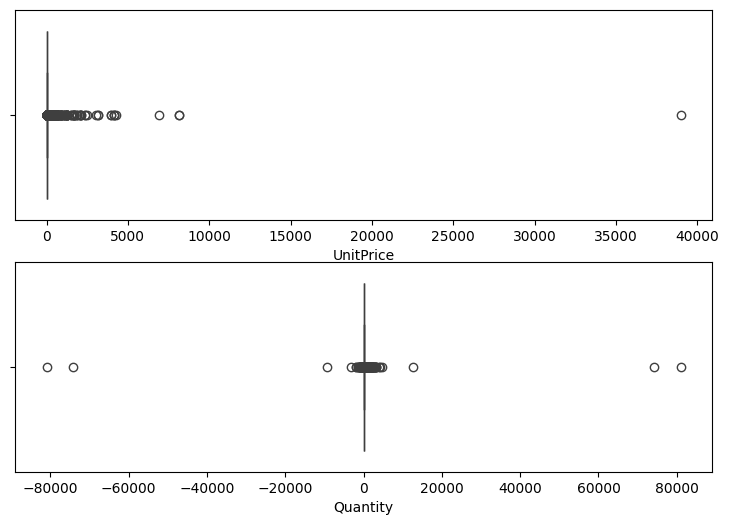

In [91]:
import matplotlib.gridspec as gridspec # subplots

# Create 2x2 sub plots
gs = gridspec.GridSpec(2, 1)

# Create a figure
plt.figure(figsize=(9,6))

# add axes_1
ax1 = plt.subplot(gs[0, 0]) 
ax1 = sns.boxplot(
    data=ecommerce_data.UnitPrice
    ,orient='h'
)

# add axes_2
ax2 = plt.subplot(gs[1, 0]) 
ax2 = sns.boxplot(
    data=ecommerce_data.Quantity
    ,orient='h'
)

plt.show()

As box plot shown above, there a number of records with negative values of quantity. These negative values could be indicates a cancellation, discount, which from RFM Analysis aspect, we may need some transaction such as discount to reflect the actual customer behaviour. So these negative values could be true outliers, not incorrect, structural errors caused by data entry, processing stages.

# II. Data Filtering

This process involves removing or excluding data that does not meet certain conditions or criteria. Includes filtering based on values, ranges, or conditions (e.g., removing outliers, selecting specific time periods) with the purpose to select only a subset of data based on specific criteria to focus on relevant information in order to produce a refined dataset that contains only the relevant information needed for analysis, in this case, for the RFM analysis.

## 2.1. Non-Product Description

In [92]:
# Check lowercase Description
ecommerce_data[ecommerce_data['Description'].str.contains('[a-z]')]['Description'].value_counts()

Description
Manual                                 460
BAG 125g SWIRLY MARBLES                252
3 TRADITIONAl BISCUIT CUTTERS  SET     207
BAG 250g SWIRLY MARBLES                201
POLYESTER FILLER PAD 40x40cm           185
POLYESTER FILLER PAD 45x45cm           135
BAG 500g SWIRLY MARBLES                115
Next Day Carriage                       80
Discount                                77
FRENCH BLUE METAL DOOR SIGN No          75
POLYESTER FILLER PAD 45x30cm            37
POLYESTER FILLER PAD 30CMx30CM          26
ESSENTIAL BALM 3.5g TIN IN ENVELOPE     18
CRUK Commission                         16
NUMBER TILE COTTAGE GARDEN No           12
Bank Charges                            12
FOLK ART GREETING CARD,pack/12          10
NUMBER TILE VINTAGE FONT No              7
THE KING GIFT BAG 25x24x12cm             7
POLYESTER FILLER PAD 65CMx65CM           5
FLOWERS HANDBAG blue and orange          3
High Resolution Image                    3
POLYESTER FILLER PAD 60x40cm             1

Description such as Manual, Bank Charges, etc is not product, therefore, let's gather these values into a non product list.

In [93]:
not_products = ['Next Day Carriage', 
                'Discount', 
                'CRUK Commission', 
                'Bank Charges', 
                'Manual']

In [94]:
# Check short Description
def short_description(desc):
    return len(desc.split()) < 3
ecommerce_data[
    (ecommerce_data['Description'].apply(lambda x: short_description(x))) &
    (~ecommerce_data['Description'].isin(not_products))
]['Description'].unique()

array(['POSTAGE', 'CHOCOLATE CALCULATOR', 'CHILLI LIGHTS', 'PHOTO CUBE',
       'RETROSPOT LAMP', 'PICTURE DOMINOES', 'DOORMAT TOPIARY',
       'DOORMAT HEARTS', 'WRAP COWBOYS  ', 'FLOWERS  STICKERS',
       'OWL DOORSTOP', 'WICKER STAR ', 'CHRYSANTHEMUM NOTEBOOK',
       'BUTTON BOX ', 'POLKADOT PEN', 'GRAND CHOCOLATECANDLE', 'CARRIAGE',
       'DOORMAT AIRMAIL ', 'NEWSPAPER STAND', 'BINGO SET',
       'CHRYSANTHEMUM SKETCHBOOK ', 'SKULLS  STICKERS', 'GLAMOROUS  MUG',
       'SPACE FROG', 'SPACE OWL', 'DECOUPAGE,GREETING CARD,',
       'DOGGY RUBBER', 'SKULLS TAPE', 'HEARTS  STICKERS', 'PARTY BUNTING',
       'POTTERING MUG', 'SANDALWOOD FAN', 'SOMBRERO ', 'ANIMAL STICKERS',
       'RAIN PONCHO ', 'MIRROR CORNICE', 'CARNIVAL BRACELET',
       'HEART CALCULATOR', 'CHRYSANTHEMUM  JOURNAL',
       'BUTTERFLIES STICKERS', 'TUMBLER, BAROQUE', 'PLASMATRONIC LAMP',
       'DAISY JOURNAL ', 'SWEETIES  STICKERS', 'DAISY NOTEBOOK ',
       'GOLD WASHBAG', 'WOODLAND  STICKERS', 'DAISY SKETCHBOOK

'POSTAGE', 'DOTCOM POSTAGE' and 'CARRIAGE' are not products. So I will have them appended to the not_products list

In [95]:
not_products.append('POSTAGE')
not_products.append('CARRIAGE')
not_products.append('DOTCOM POSTAGE')
not_products

['Next Day Carriage',
 'Discount',
 'CRUK Commission',
 'Bank Charges',
 'Manual',
 'POSTAGE',
 'CARRIAGE',
 'DOTCOM POSTAGE']

Let's review records contain these non-product description

In [96]:
for not_product in not_products:    
    ecommerce_data[ecommerce_data['Description'] == not_product].sample(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
384786,580024,23444,Next Day Carriage,1,2011-12-01 11:51:00,15.0,15172,United Kingdom
362774,577727,23444,Next Day Carriage,1,2011-11-21 12:43:00,15.0,15671,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
20274,C538897,D,Discount,-1,2010-12-15 09:14:00,5.76,16422,United Kingdom
20275,C538897,D,Discount,-1,2010-12-15 09:14:00,42.50,16422,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
239504,C566216,CRUK,CRUK Commission,-1,2011-09-09 15:17:00,15.96,14096,United Kingdom
286185,C570487,CRUK,CRUK Commission,-1,2011-10-10 17:12:00,411.92,14096,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
262731,568375,BANK CHARGES,Bank Charges,1,2011-09-26 17:01:00,15.0,13405,United Kingdom
121491,551945,BANK CHARGES,Bank Charges,1,2011-05-05 11:09:00,15.0,16714,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
176756,558875,M,Manual,2,2011-07-04 13:35:00,8.95,13301,United Kingdom
252874,567485,M,Manual,60,2011-09-20 13:52:00,0.08,15026,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
401425,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.0,12662,Germany
224353,C564331,POST,POSTAGE,-1,2011-08-24 13:57:00,18.0,12569,Germany


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
163344,557136,C2,CARRIAGE,1,2011-06-17 09:23:00,50.0,14911,EIRE
246229,566776,C2,CARRIAGE,1,2011-09-15 09:53:00,50.0,14911,EIRE


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
228469,564764,DOT,DOTCOM POSTAGE,1,2011-08-30 10:49:00,11.17,14096,United Kingdom
253972,567656,DOT,DOTCOM POSTAGE,1,2011-09-21 14:40:00,878.55,14096,United Kingdom


From the data above and through online research, I came to conclusion that: 
- POSTAGE/DOTCOM POSTAGE/Next Day Carriage: The amount spent by the user on postages.
- Discount: This explains the discount provided for a product.
- CRUK Commission: An initiative to pay some part of the sales to the Cancer Research UK (CRUK).
- Bank Charges: A default fee (about 15 sterling) that customers pay every time they use a bank service as payment method for each purchase. This fee does not directly affect sales.
- Manual: Since there is no proper definition we can think of this as manual service provided for the purchase of an item.


Except for Discount, all the other categories do not directly affect the sales. Hence, we can remove those from the data.

In [97]:
not_products.remove('Discount')

# Drop rows with not products
ecommerce_data = ecommerce_data[~ecommerce_data['Description'].isin(not_products)]

# validate the result
ecommerce_data['Description'].isin(not_products).sum()

0

In [98]:
ecommerce_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 399690 entries, 0 to 401603
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    399690 non-null  object        
 1   StockCode    399690 non-null  object        
 2   Description  399690 non-null  object        
 3   Quantity     399690 non-null  int64         
 4   InvoiceDate  399690 non-null  datetime64[ns]
 5   UnitPrice    399690 non-null  float64       
 6   CustomerID   399690 non-null  object        
 7   Country      399690 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.4+ MB


## 2.2. Cancelled Transactions
As the data description, invoiceNo starting with 'C' are cancelled transactions. Let's check if they are directly affected to the sales or not.

In [99]:
condition = (ecommerce_data['InvoiceNo'].str.contains('C')) & (~ecommerce_data['Description'].str.contains('Discount'))
ecommerce_data[condition].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548,United Kingdom
915,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897,United Kingdom
1404,C536543,22632,HAND WARMER RED RETROSPOT,-1,2010-12-01 14:30:00,2.10,17841,United Kingdom


(array([2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 8.502e+03]),
 array([-8.09950e+04, -7.28956e+04, -6.47962e+04, -5.66968e+04,
        -4.85974e+04, -4.04980e+04, -3.23986e+04, -2.42992e+04,
        -1.61998e+04, -8.10040e+03, -1.00000e+00]),
 <BarContainer object of 10 artists>)

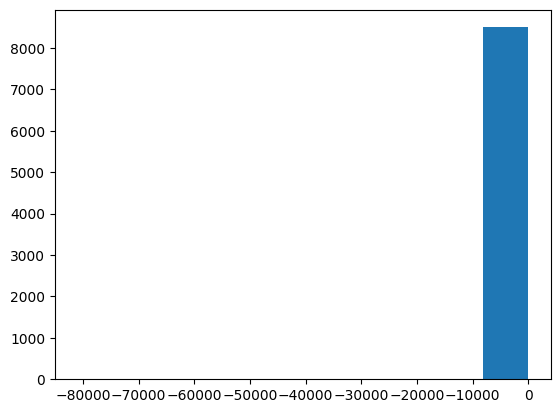

In [100]:
plt.hist(ecommerce_data[condition]['Quantity'])

In [101]:
ecommerce_data[condition]['Description'].value_counts().head(10)

Description
REGENCY CAKESTAND 3 TIER              180
JAM MAKING SET WITH JARS               86
SET OF 3 CAKE TINS PANTRY DESIGN       72
STRAWBERRY CERAMIC TRINKET BOX         54
ROSES REGENCY TEACUP AND SAUCER        53
RECIPE BOX PANTRY YELLOW DESIGN        47
JUMBO BAG RED RETROSPOT                44
WOOD 2 DRAWER CABINET WHITE FINISH     42
WHITE HANGING HEART T-LIGHT HOLDER     42
LUNCH BAG RED RETROSPOT                42
Name: count, dtype: int64

In [102]:
ecommerce_data[ecommerce_data['CustomerID']=='17548'].sort_values(by='InvoiceDate').head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548,United Kingdom


Cancelled Transactions are refunded transactions for the customers after they cancelled their orders, this data is directly affecting the sales only when it had a successful recorded order beforehand. (For example: on 2010-12-01, there is only the cancelled Invoice, this does not make sense since it lacks it's cancelled order since the data is recorded from 2010-12-01, therefore, it does not accurately represent an aspect of monetary and should be excluded from the calcualation)

In [103]:
# Calculate the Monetary value for each record
ecommerce_data['Monetary'] = ecommerce_data['Quantity'] * ecommerce_data['UnitPrice']
# Create a new column for the date only
ecommerce_data['InvoiceOnlyDate'] = ecommerce_data['InvoiceDate'].apply(lambda x: dt.datetime.date(x))
# pre-processed data
preprocessed_data = ecommerce_data.groupby(['CustomerID','InvoiceOnlyDate']).agg({
    'Monetary': 'sum' # Monetary value: sum of all transactions
    ,'InvoiceNo': 'nunique'
}).reset_index()

cancelled_data = ecommerce_data[(ecommerce_data['InvoiceNo'].str.contains('C'))].groupby(['CustomerID','InvoiceOnlyDate']).agg({
    'InvoiceNo': 'nunique'
}).rename(columns={'InvoiceNo':'CancelledNo'}).reset_index()
preprocessed_data = preprocessed_data.merge(cancelled_data, on=['CustomerID','InvoiceOnlyDate'], how='left').fillna(0)
preprocessed_data['InvoiceNo'] = preprocessed_data['InvoiceNo'] - preprocessed_data['CancelledNo']
preprocessed_data.drop(columns=['CancelledNo'], inplace=True)
preprocessed_data.head()

,CustomerID,InvoiceOnlyDate,Monetary,InvoiceNo
0,12346,2011-01-18,0.00,1.0
1,12347,2010-12-07,711.79,1.0
2,12347,2011-01-26,475.39,1.0
3,12347,2011-04-07,636.25,1.0
4,12347,2011-06-09,382.52,1.0


In [104]:
preprocessed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19129 entries, 0 to 19128
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       19129 non-null  object 
 1   InvoiceOnlyDate  19129 non-null  object 
 2   Monetary         19129 non-null  float64
 3   InvoiceNo        19129 non-null  float64
dtypes: float64(2), object(2)
memory usage: 597.9+ KB


In [105]:
# Remove negative and zero Monetary values
first_purchase_indexes = preprocessed_data.groupby('CustomerID')['InvoiceOnlyDate'].idxmin()
first_payment = preprocessed_data.loc[first_purchase_indexes, 'Monetary']
while any(x <= 0 for x in first_payment):
    preprocessed_data.drop(first_payment[first_payment <= 0].index, inplace=True)
    first_purchase_indexes = preprocessed_data.groupby('CustomerID')['InvoiceOnlyDate'].idxmin()
    first_payment = preprocessed_data.loc[first_purchase_indexes, 'Monetary']

In [106]:
preprocessed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18980 entries, 1 to 19128
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       18980 non-null  object 
 1   InvoiceOnlyDate  18980 non-null  object 
 2   Monetary         18980 non-null  float64
 3   InvoiceNo        18980 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.2+ MB


In [107]:
preprocessed_data.head(10)

,CustomerID,InvoiceOnlyDate,Monetary,InvoiceNo
1,12347,2010-12-07,711.79,1.0
2,12347,2011-01-26,475.39,1.0
3,12347,2011-04-07,636.25,1.0
4,12347,2011-06-09,382.52,1.0
5,12347,2011-08-02,584.91,1.0
6,12347,2011-10-31,1294.32,1.0
7,12347,2011-12-07,224.82,1.0
8,12348,2010-12-16,652.80,1.0
9,12348,2011-01-25,187.44,1.0
10,12348,2011-04-05,327.00,1.0


In [108]:
preprocessed_data.CustomerID.nunique()

4332

The data is cleaned and ready to generate the RFM Score

# III. RFM Analysis
- **Recency (days)**: Measures how recent was each customer's last purchase
- **Frequency (invoices)**: Measures how many purchases the customer has done in the recorded period (in this case 12-month)
- **Monetary (M)**: How much money a customer spends in the recorded period (in this case 12-month). Customers who spend more are considered high-value and should be prioritized in retention and upselling strategies.

In [109]:
processed_data = preprocessed_data.groupby('CustomerID').agg({
    'InvoiceOnlyDate': 'max', # Recency: the last transaction date
    'InvoiceNo': 'sum', # Frequency: total number of transactions excluding cancelled ones
    'Monetary': 'sum' # Monetary: sum of all transactions
}).rename(columns={
    'InvoiceOnlyDate': 'Recency'
    ,'InvoiceNo': 'Frequency'
})
processed_data['Frequency'] = processed_data['Frequency'].astype(int)
processed_data['Recency'] = (processed_data['Recency'].max() - processed_data['Recency'])
processed_data['Recency'] = processed_data['Recency'].apply(lambda x: x.days)
processed_data.head()

,Recency,Frequency,Monetary
CustomerID,,,
12347,2,7,4310.00
12348,75,4,1437.24
12349,18,1,1457.55
12350,310,1,294.40
12352,36,7,1265.41


In [110]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4332 entries, 12347 to 18287
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    4332 non-null   int64  
 1   Frequency  4332 non-null   int32  
 2   Monetary   4332 non-null   float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 118.5+ KB


# IV. RFM Score & RFM Segment

In [112]:
# Recency feature of the RFM model is the opposite of the Monetary feature since the more recent the transaction, the higher the Recency value, therefore we need to reverse the Recency values
processed_data["RecencyScore"] = pd.qcut(processed_data["Recency"], 5, labels = [5, 4 , 3, 2, 1])

# Since Frequency feature of the RFM model is distributed skewly towards the right, we can use rank() function with first method to help ranking these values based on the order they appear in the array, then qcut() function to create 5 equal-sized bins 
processed_data["FrequencyScore"]= pd.qcut(processed_data["Frequency"].rank(method="first"),5, labels=[1,2,3,4,5])

# Monetary feature of the RFM model is directly proportional, therefore we can use the qcut function to create 5 equal-sized bins
processed_data["MonetaryScore"] = pd.qcut(processed_data["Monetary"], 5, labels = [1, 2, 3, 4, 5])

In [114]:
# RFMSegment feature is created by concatenating the RecencyScore, FrequencyScore and MonetaryScore columns
processed_data["RFMSegment"] = (
    processed_data['RecencyScore'].astype(str) + 
    processed_data['FrequencyScore'].astype(str) + 
    processed_data['MonetaryScore'].astype(str)
)

# RFMScore feature is calculated by summing the RecencyScore, FrequencyScore and MonetaryScore columns
processed_data["RFMScore"] = processed_data[['RecencyScore','FrequencyScore','MonetaryScore']].sum(axis=1)
processed_data.head()
print(f'an RFM segment based from three different RFM values has {processed_data["RFMSegment"].nunique()} unique values')
print(f'RFM score that sums up the RFM values and indicates a relative customer value has {processed_data["RFMScore"].nunique()} unique values ranging from 3 to 15')

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFMSegment,RFMScore
CustomerID,,,,,,,,
12347,2,7,4310.00,5,5,5,555,15
12348,75,4,1437.24,2,4,4,244,10
12349,18,1,1457.55,4,1,4,414,9
12350,310,1,294.40,1,1,2,112,4
12352,36,7,1265.41,3,5,4,354,12


an RFM segment based from three different RFM values has 120 unique values
RFM score that sums up the RFM values and indicates a relative customer value has 13 unique values ranging from 3 to 15


# V. RFM Segments Analysis

In [117]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4332 entries, 12347 to 18287
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Recency         4332 non-null   int64   
 1   Frequency       4332 non-null   int32   
 2   Monetary        4332 non-null   float64 
 3   RecencyScore    4332 non-null   category
 4   FrequencyScore  4332 non-null   category
 5   MonetaryScore   4332 non-null   category
 6   RFMSegment      4332 non-null   object  
 7   RFMScore        4332 non-null   int64   
dtypes: category(3), float64(1), int32(1), int64(2), object(1)
memory usage: 199.5+ KB


In [120]:
# top 10 largest RFM segments
processed_data['RFMSegment'].value_counts()[:10]

RFMSegment
555    357
111    183
455    170
121    157
112    121
444    104
544     95
122     95
344     90
233     88
Name: count, dtype: int64

# VI. RFM Scores Analysis

## 6.1. Grouping into named segments based on RFM Scores

Although intuitive, it is still hard to fully interpret this segmentation. Often, we will group customers based on their RFM scores into an even smaller number of segments:
- Bronze:   RFMScore $\in [3,6)$
- Silver:   RFMScore $\in [6,9)$
- Gold:     RFMScore $\in [9,12)$
- Platinum: RFMScore $\in [12,14)$
- Diamond: RFMScore $\in [14,15]$

In [134]:
def segment_me_by_rfmscore(score):
    if score >= 14:
        return 'Diamond'
    elif score >= 12:
        return 'Platinum'
    elif score >= 9:
        return 'Gold'
    elif score >= 6:
        return 'Silver'
    else:
        return 'Bronze'
    
processed_data['ScoreSegment'] = processed_data['RFMScore'].apply(segment_me_by_rfmscore)
processed_data.ScoreSegment.value_counts()

ScoreSegment
Silver      1156
Gold        1043
Bronze       891
Diamond      648
Platinum     594
Name: count, dtype: int64

In [135]:
processed_data.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFMSegment,RFMScore,ScoreSegment
CustomerID,,,,,,,,,
12347,2,7,4310.00,5,5,5,555,15,Diamond
12348,75,4,1437.24,2,4,4,244,10,Gold
12349,18,1,1457.55,4,1,4,414,9,Gold
12350,310,1,294.40,1,1,2,112,4,Bronze
12352,36,7,1265.41,3,5,4,354,12,Platinum


Let's analyze the RFM values through each Segment by RFM Score

In [136]:
processed_data.groupby('ScoreSegment').agg({
    'Recency': 'mean'
    ,'Frequency': 'mean'
    ,'Monetary': ['mean','count']
}).sort_values(by=('Recency',  'mean')).round(1)

Recency Frequency Monetary      
                mean      mean     mean count
ScoreSegment                                 
Diamond          9.0      13.9   7822.4   648
Platinum        26.8       5.6   2173.9   594
Gold            53.7       3.1   1098.5  1043
Silver         100.3       1.6    487.8  1156
Bronze         221.6       1.0    222.0   891

In [138]:
# Let's see how many sub segments based on RFM concatnation we have in each score segment
segment = processed_data.groupby(['ScoreSegment','RFMSegment']).size().to_frame().rename(columns={0: 'Count'})
segment
# .sort_values(by='Count', ascending=False)

Count
ScoreSegment RFMSegment       
Bronze       111           183
             112           121
             113            34
             121           157
             122            95
             131            21
             211            79
             212            67
             221            65
             311            69
Diamond      455           170
             545            43
             554            78
             555           357
Gold         135             6
             144            14
             145             3
             153             3
             154             4
             155             5
             225             6
             234            56
             235            12
             243            47
             244            70
             245            29
             252             1
             253             5
             254            17
             315             2
             324            20
             325             3
             333            63
             334            39
             335            16
             342            13
             343            65
             344            90
             351             1
             353             5
             414             1
             423            26
             424             8
             425             4
             432            45
             433            65
             434            35
             442            13
             443            72
             452             1
             513             4
             514             1
             515             2
             522            17
             523            19
             524            14
             531            20
             532            32
             533            51
             541             2
             542            15
             551             1
Platinum     255            28
             345            41
             354            34
             355            75
             435             6
             444           104
             445            40
             453            11
             454            65
             525             2
             534            33
             535             5
             543            51
             544            95
             552             1
             553             3
Silver       114            19
             115             3
             123            40
             124            11
             125             4
             132            51
             133            37
             134            17
             141             3
             142            10
             143            19
             152             1
             213            37
             214            14
             215             5
             222            60
             223            49
             224            16
             231            25
             232            55
             233            88
             241             7
             242            17
             251             1
             312            54
             313            26
             314            11
             321            69
             322            55
             323            31
             331            20
             332            52
             341             3
             411            49
             412            32
             413            15
             421            41
             422            41
             431            16
             511            22
             512            17
             521            13

## 6.2. Segmentation by RFMSegment

**1. Champions (Score: 5, 5, 5)**
- Description: These are your best customers. They are recent, frequent, and spend the most. They should be your top priority for retention and loyalty programs.


**2. Runner-Ups (Score: 4-5, 4-5, 4-5)**
- Description: These customers are regular buyers and often spend well. They are loyal, though not as frequent or high-spending as champions.


**3. Loyal Customers (Score: 4-5, 4-5)**
- Description: These customers are regular buyers. They are loyal, though not as high-spending as champions and Runner-Ups.


**4. Promising (Score: 3-4, 1-3, 4-5)**
- Description: These customers might have high spending potential, but they don’t shop as frequently or as recently. With proper nurturing focus on increasing Frequency, they could become loyal.


**5. Potential Loyalists (Score: 3-5, 3-5)**
- Description: These customers shop often, but they may not have bought recently. If they are engaged further, they could be converted into loyal customers.


**6. Need Attention (Score: 3-4, 1-2)**
- Description: These customers have bought recently but they don’t buy very often and not spend much. They may need a special offer or incentive to turn them into potential loyalists.


**7. About to Sleep (Score: 2, 3-5)**
- Description: They have been loyal frequent buyers, but haven't purchased in a while. You need to engage them before they churn.


**8. At Risk (Score: 2, 2)**
- Description: These customers are at risk of churning. They haven't purchased recently and don't shop frequently. They need re-engagement.


**9. Can’t Lose (Score: 1-2, 3-5, 5)**
- Description: These customers haven’t bought recently but are high spenders. You must focus on retaining them because of their potential value.


**10. Hibernating (Score: 1-2, 1-5)**
- Description: These customers are long-term non-buyers. You need to re-engage them with targeted campaigns.


**10. New Customers (Score: 5, 1-2)**
- Description: These customers made a recent purchase but haven’t bought again or spent much yet. You need to focus on turning them into frequent buyers.



In [195]:
# logic for RFM segmentation
seg_map = {
    r'555': 'Champions',
    r'[4-5][4-5][4-5]': 'Runner-Ups',
    r'[3-4][1-3][4-5]': 'Promising',
    r'[1-2][3-5]5': 'Can\'t Lose'
}

start_with = {
    r'[4-5][4-5]': 'Loyal Customers',
    r'[3-5][3-5]': 'Potential Loyalists',
    r'[3-4][1-2]': 'Need Attention',
    r'2[3-5]': 'About to Sleep',
    r'22': 'At Risk',
    r'[1-2][1-5]': 'Hibernating',
    r'5[1-2]': 'New Customers'
}

processed_data.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFMSegment,RFMScore,ScoreSegment,Segment
CustomerID,,,,,,,,,,
12347,2,7,4310.00,5,5,5,555,15,Diamond,Champions
12348,75,4,1437.24,2,4,4,244,10,Gold,244
12349,18,1,1457.55,4,1,4,414,9,Gold,Promising
12350,310,1,294.40,1,1,2,112,4,Bronze,112
12352,36,7,1265.41,3,5,4,354,12,Platinum,354


In [196]:
# Create a new column for the segment
processed_data['Segment'] = processed_data['RFMSegment'].replace(seg_map, regex=True)

processed_data.head()
# [i for i in processed_data['Segment'].unique() if i not in seg_map.values()]

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFMSegment,RFMScore,ScoreSegment,Segment
CustomerID,,,,,,,,,,
12347,2,7,4310.00,5,5,5,555,15,Diamond,Champions
12348,75,4,1437.24,2,4,4,244,10,Gold,244
12349,18,1,1457.55,4,1,4,414,9,Gold,Promising
12350,310,1,294.40,1,1,2,112,4,Bronze,112
12352,36,7,1265.41,3,5,4,354,12,Platinum,354


In [197]:
left = processed_data[processed_data['Segment'].str.isdigit()]
left['Segment'] = left['RFMSegment'].apply(lambda x: x[:2])
left['Segment'] = left['Segment'].replace(start_with, regex=True)

C:\Users\Hung\AppData\Local\Temp\ipykernel_16944\3995264215.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left['Segment'] = left['RFMSegment'].apply(lambda x: x[:2])
C:\Users\Hung\AppData\Local\Temp\ipykernel_16944\3995264215.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left['Segment'] = left['Segment'].replace(start_with, regex=True)


In [198]:
a = processed_data[~processed_data['Segment'].str.isdigit()]
b = left[~left['Segment'].str.isdigit()]
c = left[left['Segment'].str.isdigit()]

In [203]:
print(f'did we miss any segment? {not c.empty}')

did we miss any segment? False


In [206]:
rfm_segmented = pd.concat([a,b])
rfm_segmented.head()
rfm_segmented['Segment'].value_counts()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFMSegment,RFMScore,ScoreSegment,Segment
CustomerID,,,,,,,,,,
12347,2,7,4310.00,5,5,5,555,15,Diamond,Champions
12349,18,1,1457.55,4,1,4,414,9,Gold,Promising
12356,22,3,2487.43,4,3,5,435,12,Platinum,Promising
12357,33,1,6207.67,3,1,5,315,9,Gold,Promising
12359,7,4,6182.98,5,4,5,545,14,Diamond,Runner-Ups


Segment
Hibernating            1049
Potential Loyalists     729
Runner-Ups              595
Need Attention          508
About to Sleep          389
Champions               357
At Risk                 196
Loyal Customers         170
Promising               145
New Customers           111
Can't Lose               83
Name: count, dtype: int64

In [211]:
for i in rfm_segmented['Segment'].unique():
    i
    rfm_segmented[rfm_segmented['Segment'] == i].groupby('ScoreSegment').agg({
        'Recency': 'mean'
        ,'Frequency': 'mean'
        ,'Monetary': ['mean','count']
    })

'Champions'

Recency  Frequency      Monetary      
                  mean       mean          mean count
ScoreSegment                                         
Diamond       4.619048  17.868347  10784.112773   357

'Promising'

Recency Frequency     Monetary      
                   mean      mean         mean count
ScoreSegment                                        
Gold          39.718750  2.367188  1525.317656   128
Platinum      21.666667  2.833333  3047.276667     6
Silver        54.545455  1.000000  1182.995455    11

'Runner-Ups'

Recency Frequency     Monetary      
                   mean      mean         mean count
ScoreSegment                                        
Diamond       14.446735  9.089347  4188.986186   291
Platinum      16.138158  5.000000  1640.294375   304

"Can't Lose"

Recency Frequency     Monetary      
                    mean      mean         mean count
ScoreSegment                                         
Gold          136.672727  4.690909  4096.872018    55
Platinum      105.892857  8.678571  4134.724643    28

'About to Sleep'

Recency Frequency     Monetary      
                    mean      mean         mean count
ScoreSegment                                         
Gold          106.158163  3.857143  1159.292398   196
Silver        118.155440  2.445596   460.966891   193

'Hibernating'

Recency Frequency     Monetary      
                    mean      mean         mean count
ScoreSegment                                         
Bronze        245.468956  1.051519   235.831664   757
Gold          222.857143  4.666667  1238.732857    21
Silver        215.243542  1.863469   824.218155   271

'Potential Loyalists'

Recency Frequency     Monetary      
                   mean      mean         mean count
ScoreSegment                                        
Gold          32.002222  2.924444   722.400136   450
Platinum      38.973404  6.500000  3219.983830   188
Silver        43.549451  2.131868   274.534286    91

'New Customers'

Recency Frequency     Monetary      
                  mean      mean         mean count
ScoreSegment                                       
Gold          6.017544  1.596491   819.288421    57
Platinum      7.500000  2.000000  2691.880000     2
Silver        6.076923  1.000000   209.625385    52

'At Risk'

Recency Frequency     Monetary      
                    mean      mean         mean count
ScoreSegment                                         
Bronze        125.584615  1.061538   144.665077    65
Gold          107.666667  1.500000  3694.371667     6
Silver        110.608000  1.408000   573.249768   125

'Need Attention'

Recency Frequency    Monetary      
                   mean      mean        mean count
ScoreSegment                                       
Bronze        50.434783  1.000000  142.804928    69
Gold          23.846154  1.653846  636.327692    26
Silver        39.089588  1.113801  317.350630   413

'Loyal Customers'

Recency Frequency    Monetary      
                   mean      mean        mean count
ScoreSegment                                       
Gold          17.913462  3.701923  590.950288   104
Platinum       8.363636  4.560606  724.704394    66

## 3.1. Distribution Plot

<Figure size 900x900 with 0 Axes>

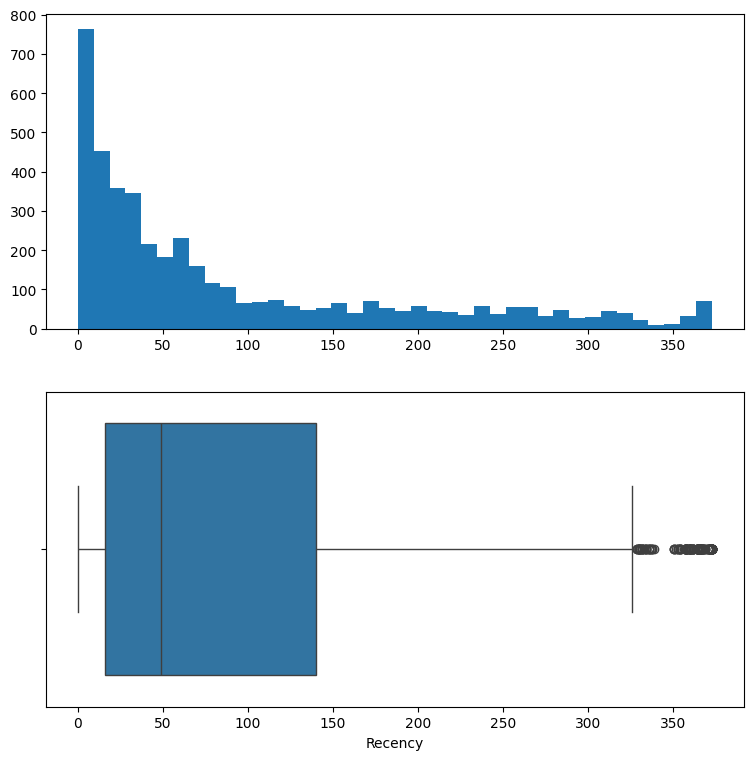

In [39]:
import matplotlib.gridspec as gridspec
# Create 2x1 sub plots
gs = gridspec.GridSpec(2, 1)

x = processed_data['Recency']

# Create a figure
plt.figure(figsize=(9,9))

# add axes_1 row 0, col 0
ax1 = plt.subplot(gs[0, 0]) 
ax1 = plt.hist(x, bins=40)

# add axes_2 row 1, col 0
ax2 = plt.subplot(gs[1, 0]) 
ax2 = sns.boxplot(
    data=x
    ,orient='h'
)

# display plot
plt.show()

<Figure size 900x900 with 0 Axes>

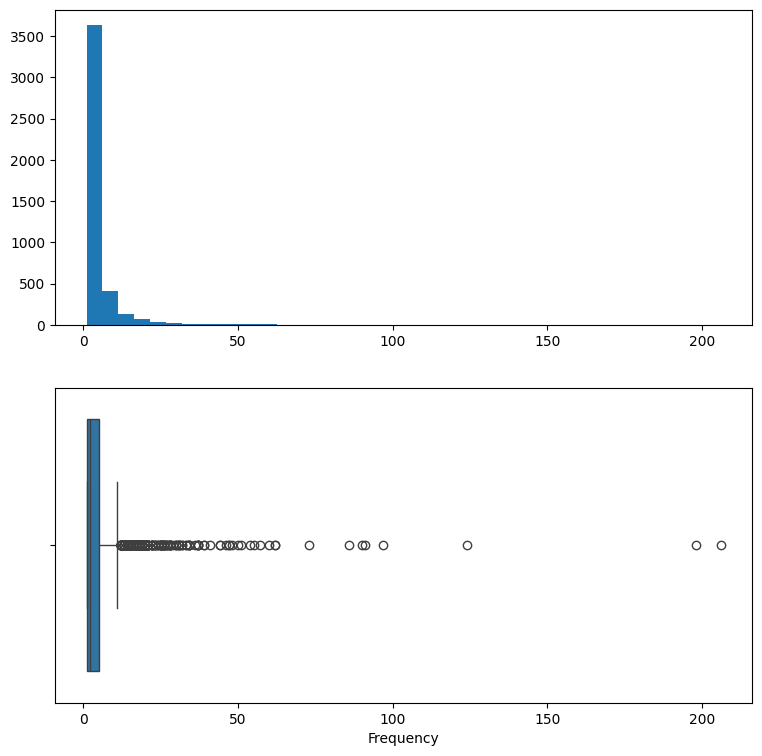

In [40]:
import matplotlib.gridspec as gridspec
# Create 2x1 sub plots
gs = gridspec.GridSpec(2, 1)

x = processed_data['Frequency']

# Create a figure
plt.figure(figsize=(9,9))

# add axes_1 row 0, col 0
ax1 = plt.subplot(gs[0, 0]) 
ax1 = plt.hist(x, bins=40)

# add axes_2 row 1, col 0
ax2 = plt.subplot(gs[1, 0]) 
ax2 = sns.boxplot(
    data=x
    ,orient='h'
)

# display plot
plt.show()

<Figure size 900x900 with 0 Axes>

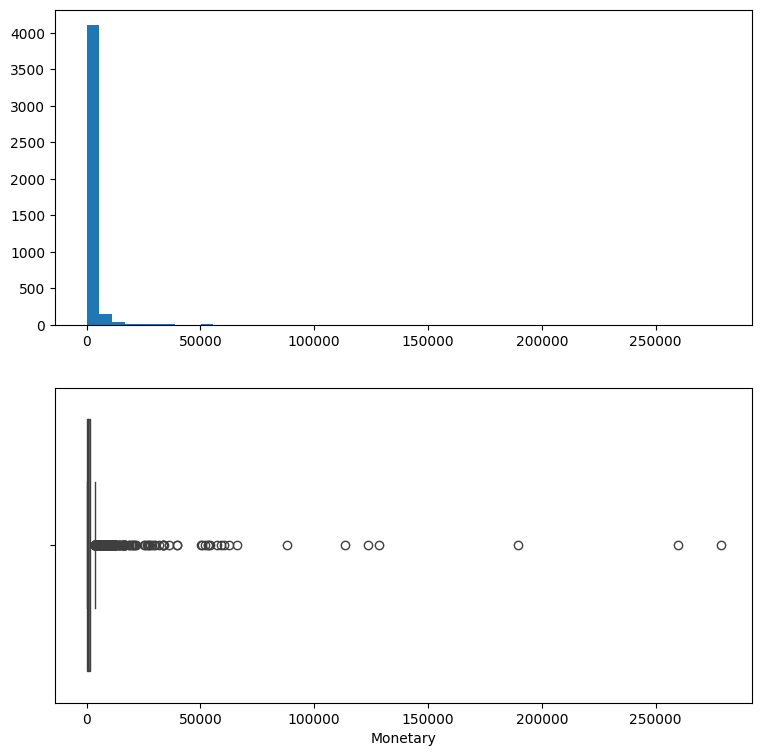

In [41]:
import matplotlib.gridspec as gridspec
# Create 2x1 sub plots
gs = gridspec.GridSpec(2, 1)

x = processed_data['Monetary']

# Create a figure
plt.figure(figsize=(9,9))

# add axes_1 row 0, col 0
ax1 = plt.subplot(gs[0, 0]) 
ax1 = plt.hist(x, bins=50)

# add axes_2 row 1, col 0
ax2 = plt.subplot(gs[1, 0]) 
ax2 = sns.boxplot(
    data=x
    ,orient='h'
)

# display plot
plt.show()

# VII. Recommendations

## 7.1. Action Plans tailored for each segments

1. Champions (R5, F5, M5)
- Customer Profile: These are your best customers—frequent buyers who spend a lot and have purchased recently.
- Action Plan:
    + Reward loyalty: Offer exclusive loyalty programs, early access to new products, or VIP rewards.
    + Personalized offers: Send personalized messages and tailored discounts based on their past purchase behavior.
    + Referral programs: Encourage these customers to refer others by offering them incentives or rewards for successful referrals.
    + Surprise and delight: Send them thank-you gifts or special offers as a gesture of appreciation for their loyalty.
    + Content engagement: Continue to engage them through newsletters, social media, and special events.


2. Can’t Lose (R5, F4, M5)
- Customer Profile: These customers are recent and spend a lot, but may not purchase as frequently.
- Action Plan:
    + Increase frequency: Use targeted campaigns to increase purchase frequency. Offer time-limited discounts or reminders to encourage repeat purchases.
    + Reinforce loyalty: Send personalized loyalty offers to keep them engaged, such as exclusive discounts on their next purchase.
    + Leverage exclusivity: Offer access to members-only products or promotions that encourage a deeper connection.


3. Loyal Customers (R4, F4, M4)
- Customer Profile: These customers are regular, moderately high spenders, and still fairly recent.
- Action Plan:
    + Retention strategies: Focus on retention efforts such as personalized discounts, loyalty programs, and seasonal offers to keep them coming back.
    + Exclusive content: Provide access to exclusive content, sneak peeks of new arrivals, or early product releases.
    + Upsell and cross-sell: Use their purchase history to suggest complementary products or services to increase their overall spend.


4. Potential Loyalists (R5, F3, M4)
- Customer Profile: These customers have recently purchased and spent well, but their frequency needs improvement.
- Action Plan:
    + Encourage more purchases: Create special offers, incentives, or loyalty bonuses for making additional purchases within a given period.
    + Nurture the relationship: Continue to engage them through newsletters, exclusive offers, or product recommendations based on their initial purchase.
    + Feedback request: Ask them for feedback to improve your product offerings and make them feel valued.


5. Promising (R4, F3, M5)
- Customer Profile: These customers spend well but aren't as recent or frequent.
- Action Plan:
    + Re-engage: Use targeted email campaigns to bring them back with promotions like discounts or reminders.
    + Encourage frequency: Offer a time-sensitive incentive to increase the frequency of their next purchase.
    + Personalized offers: Create targeted offers that appeal to their past purchasing habits and preferences.


6. At Risk (R1, F3, M5)
- Customer Profile: Customers who have spent well in the past but have not made a recent purchase.
- Action Plan:
    + Win-back campaigns: Offer exclusive deals, discounts, or incentives to bring them back.
    + Re-engagement emails: Use compelling subject lines to remind them of your brand and their last positive experience.
    + Personalized messaging: Reach out with personalized messages and address any potential issues with their past experience to entice them back.


7. New Customers (R5, F1, M2)
- Customer Profile: These customers have just made a purchase but are infrequent and low spenders.
- Action Plan:
    + Welcome series: Send a welcome email series to introduce them to your brand and make them aware of your loyalty programs and discounts.
    + Incentivize repeat purchases: Offer them a discount on their next purchase or other promotions to encourage them to make another purchase.
    + Personalize engagement: Continue engaging them with product recommendations based on their initial purchase and highlight your best-selling or most relevant items.


8. About to Sleep (R1, F2, M3)
- Customer Profile: These customers have been inactive for some time and don't purchase frequently, with moderate spending.
- Action Plan:
    + Re-engagement efforts: Send them special offers or reminder emails with a focus on their past purchase behavior.
    + Incentivize: Offer incentives to encourage their return, such as discounts or exclusive access to new products.
    + Survey them: Ask for feedback to understand why they stopped purchasing and address any concerns they may have.


9. Need Attention (R2, F1, M4)
- Customer Profile: Customers who are infrequent and not very recent, but they spend moderately.
- Action Plan:
    + Personalized outreach: Reach out to them with special offers that encourage them to return, such as a personalized discount or exclusive offers.
    + Re-engagement emails: Send them emails tailored to their past behavior, reminding them of the value your brand can offer.
    + Promotions: Offer a limited-time offer or flash sales to increase the urgency for them to make a purchase.


10. Hibernating (R1, F1, M1)
- Customer Profile: Customers who have been inactive for a long time, rarely purchase, and spend very little.
- Action Plan:
    + Re-engagement campaigns: Implement a re-engagement campaign with a strong incentive, like deep discounts or exclusive deals.
    + Targeted outreach: Send them personalized emails or even try direct mail if your brand has a strong offline presence.
    + VIP reactivation: Offer something highly personalized to get their attention and show that you value them as a customer.

## 7.2. Performance Monitor Metrics

- Customer Retention Rate: Measure how well each segment is retained after specific campaigns.
- Conversion Rate: Track how many customers in each segment convert based on targeted offers.
- Customer Lifetime Value (CLV): Monitor changes in CLV after executing specific segment strategies.
- Revenue per Customer: Calculate the increase in revenue per customer per segment after targeted marketing.

# VIII. Additional Resources

Interesting theory about how to choose scale from your dataset size: https://www.omniconvert.com/blog/rfm-segmentation-guide/#:~:text=RFM%20segmentation%20is%20a%20method,customer%20loyalty%20and%20lifetime%20value.